<a href="https://colab.research.google.com/github/dacardonave/COVID-19/blob/master/Analisis_Comparativo_Metodos_de_Regresion_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis comparativo de los metodos de regresion 
## Analitica de datos
#### Daniel Cardona Velasquez
#### Universidad Nacional De Colombia



A continuacion presentaremos un analisis comparativo de algunos metodos de regresion ya implementados por algunas librerias en python para el entrenamiento de un modelo predictivo. En este caso en particualar, trabajaremos en una base de datos sobre el Covd-19, previamente filtrada y depurada para su entrenamiento y analisis en colombia.

In [52]:
#Importando algunas librerias de tratamiento y representacion
#Cargando el dataset sobre el que vamos a trabajar
#!pip install wget
#import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#datos covid19 - mundo
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"

#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"

#wget.download(url, 'covid.csv')
Xd = pd.read_csv(url)
Xd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27


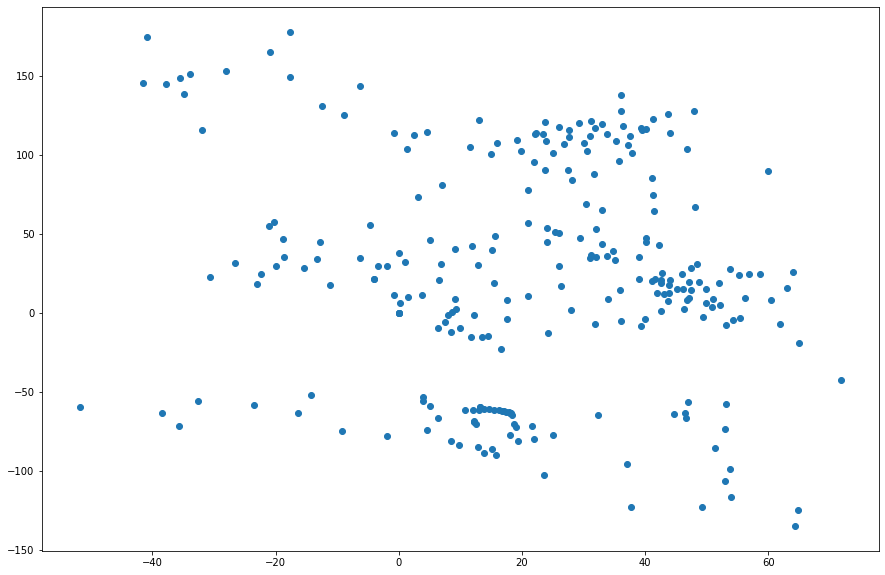

In [53]:
#Distribucion de los datos
plt.scatter(Xd['Lat'],Xd['Long'])

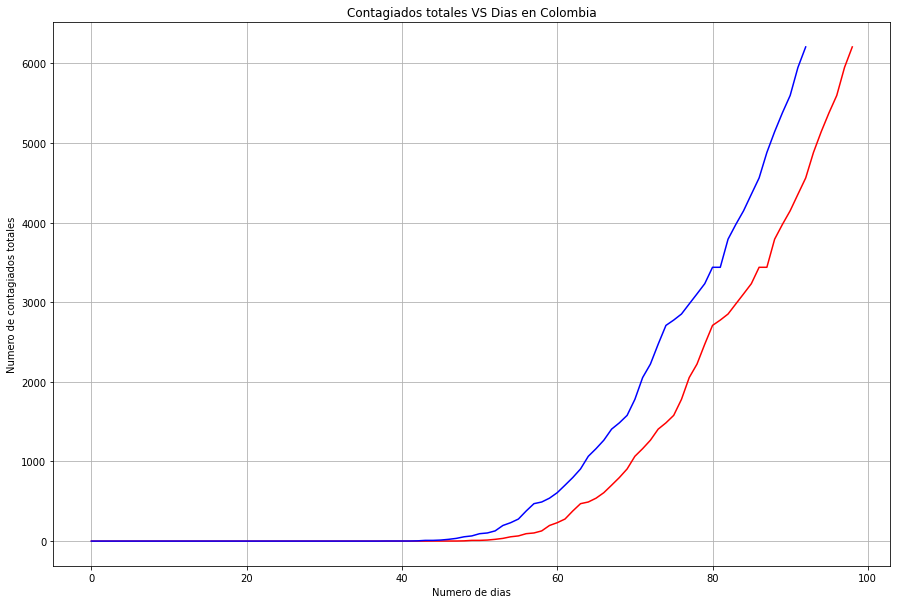

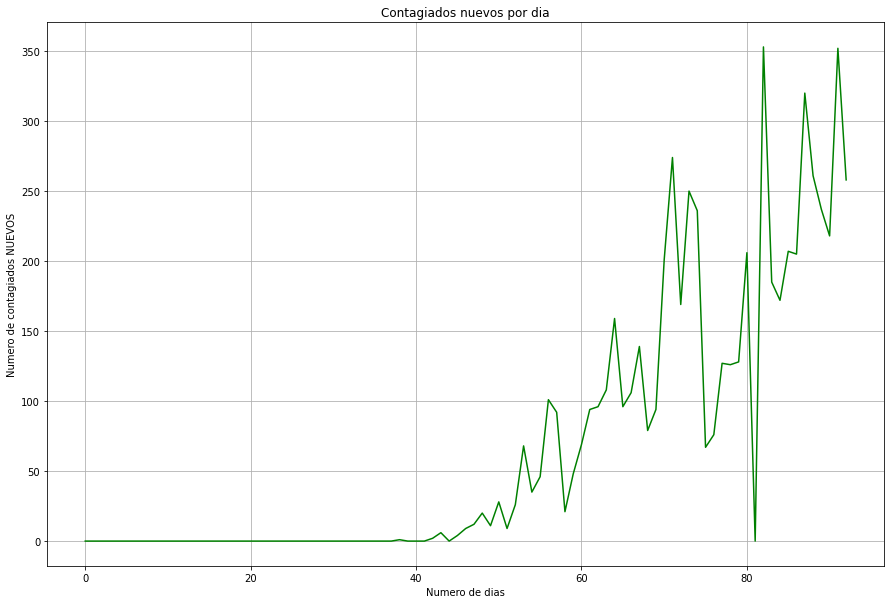

In [54]:
#funcion ventaneo --> esta funcion crea una ventana de w dias
def covid_win(serie,w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf+1].reshape(1,-1)
    pi += 1
    pf+= 1
    while pf+1 < serie.shape[0]:
      X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
      y = np.append(y,serie[pf+1].reshape(1,-1),axis=0)
      pi += 1
      pf+=1
    return X, y # X \in Real^{N x P = w}, y \in Real^N


ii = Xd[Xd.columns[1]] == 'Colombia'
#print(np.where(ii)[0][0])
#contagios  acumulados
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#numero contagiados por dia
serie_d = np.append(0,np.diff(serie))
#serie_d = np.append(0,np.cumsum(np.diff(serie)))
X,y = covid_win(serie,w=5)
X_d,y_d = covid_win(serie_d,w=5)

plt.plot(serie,'r')
plt.plot(y,'b')
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados totales")
plt.title("Contagiados totales VS Dias en Colombia")
plt.grid()
plt.show()
plt.plot(y_d,'g')
plt.title("Contagiados nuevos por dia")
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados NUEVOS")
plt.grid()



A continuacion haremos todo el proceso de entrenamiento y validacion de 5 regresores para determinar cual de ellos sigue de forma mas apropiada los datos (Linea azul y roja de los graficos anteriores)

# Entrenamiento de regresor para covid 19 - Colombia
# Análisis exploratorio - visualización en 2D PCA
# Validación cruzada y anidada (pocos datos)

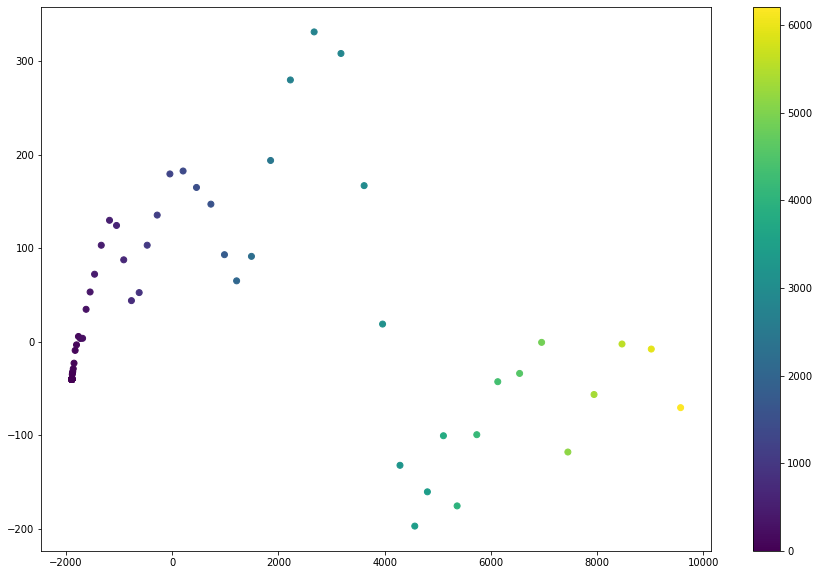

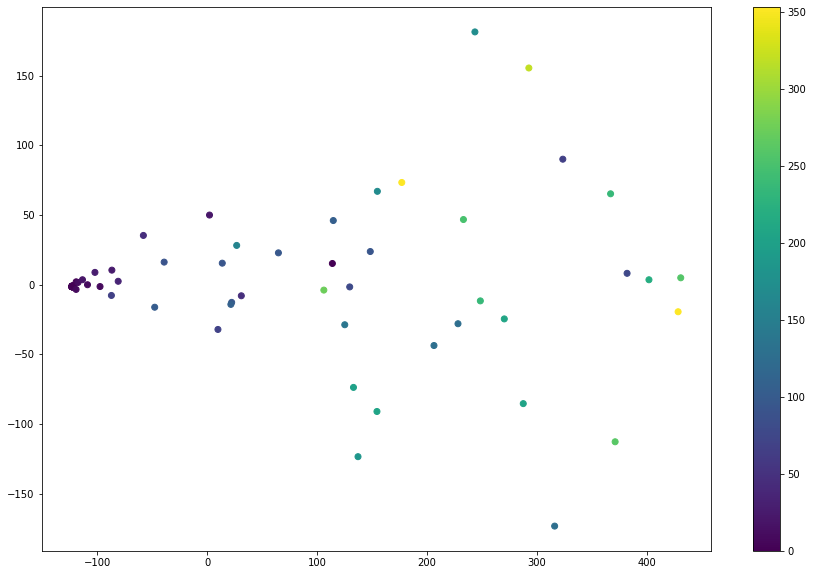

In [55]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

red = PCA(n_components = 3)
red_d = PCA(n_components = 3)

z = red.fit_transform(X)
z_d = red.fit_transform(X_d)

plt.scatter(z[:,0],z[:,1],c=y)
plt.colorbar()
plt.show()


plt.scatter(z_d[:,0],z_d[:,1],c=y_d)
plt.colorbar()
plt.show()


$$w^* = (\Phi^\top \Phi + \lambda I)^{-1}\Phi^\top y $$

$$y_n = \phi_n w^*$$


$\lambda$: hyperparameter

$\Phi(x)=\mathcal{N}(x|\mu,\sigma^2)$

$\mu,\sigma$ hyperparameters

$w$: model's parameter

In [56]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
#pocos datos y mucha incertidumbre, validación cruzada anidada

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(65, 5)
(28, 5)


In [0]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

steps = [
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', LinearRegression())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', Ridge())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', Lasso())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', ElasticNet())], 
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', KernelRidge(kernel = 'rbf'))], #clasificador 
         
         ]        


#parametros a buscar por busqueda por grilla
parameters =[
             {'reg__fit_intercept':[0.5,1,1.5,2,2.5,3],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'reg__fit_intercept':[0.5,1,1.5,2,2.5,3],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

              {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'reg__l1_ratio':[5e-3,5e-2,5e-1,5,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },
              ]

label_model = ['NorSC-PCA-LM', 'NorSC-PCA-LMRidge', 'NoSC-PCA-LMLasso', 'NorSC-PCA-LMEN', 'NorSC-PCA-KRRBF']


In [58]:
#valildacion cruzada anidada
Niter = 10 #numero particiones outter loop nested cross-validation
maev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto
best_estimators = []#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = []#mejor metodo por iteracion 
#############################
          

for j in range(Niter): #outter loop
      print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) # xtrain 60, xtest 26
      for r in range(len(steps)): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r],cv=5,verbose=10,scoring='neg_mean_absolute_error',n_jobs=5) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_hyperpar.append(grid_search.best_params_)
          
          #guardar acierto
          maev[j,r] = mae(y_test,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r,len(steps)))
          print(best_hyperpar)
          print('mae:',maev[j,r])

          savedata = {
              'acc':maev,
              'best_models':best_estimators,
              'best_hyperpar':best_hyperpar,
                } 
          dump(savedata,'covid19_1.joblib')

print("\nMejor Modelo:\n")
print(grid_search.best_estimator_)

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    4.9s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    5.1s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    5.1s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    5.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1863s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    5.2s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0804s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  64 tasks      | elapsed:    5.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1148s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    6.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fa

it 1/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 41.73825145919672
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0831s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1899s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 104 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 232 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 376 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1977s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 584 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 936 tasks      | elapsed:    3.9s
[Parallel(n_jobs=5)]: Done 1011 tasks      | elapsed:    4.0s
[Parallel(n_jobs=5)]: Done 1024 tasks      | elapsed:    4.0s
[Parallel(n_jobs=5)]: Done 1039 tasks      | elapsed:    4.1s
[Parallel(n_jobs=5)]: Done 1054 tasks      | elapsed:    4.2s
[Parallel(n_jobs=5)]: Done 1071 tasks      | elapsed:    4.3s
[Parallel(n_job

it 1/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 41.64235419517609
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0380s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0848s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1197s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0118s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0118s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

it 1/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}]
mae: 41.733949864083804
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 114 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 186 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 274 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 362 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 466 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 570 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 690 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 810 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 946 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1040 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1071 out of 1080 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0290s.) Setting batch_size=2.
[Parallel(n_jobs=

it 1/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}]
mae: 39.513896531337465
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1285s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0799s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

it 1/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}]
mae: 38.111163154403066
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0864s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 102 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 139 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0121s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0363s.) Setting batch_size=4.


it 2/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 44.61316929746004
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0980s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1444s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1799s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 2/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 44.93960440250847
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  54 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1978s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 140 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 165 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 171 out of 180 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0126s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0351s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0701s.) Setting batch_size=8.


it 2/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}]
mae: 44.62940665212218
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1365s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_job

it 2/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}]
mae: 52.849647224517945
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1117s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0925s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

it 2/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}]
mae: 29.92436494175461
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0272s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0459s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0633s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 102 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 146 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0135s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks  

it 3/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 28.54506738922359
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0928s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1715s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1958s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 3/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}]
mae: 28.670853187800486
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1435s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 122 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0106s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0400s.) Setting batch_size=4.


it 3/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}]
mae: 28.55021538159016
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0730s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1680s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1835s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 3/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}]
mae: 32.79854806511061
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1736s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  94 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 318 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 494 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 702 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 910 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0141s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0141s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0

it 3/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}]
mae: 34.649119095293564
it 4/10
Fitting 5 folds for e

[Parallel(n_jobs=5)]: Batch computation too fast (0.1373s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 126 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 142 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 153 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0094s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 4/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}]


[Parallel(n_jobs=5)]: Batch computation too fast (0.0786s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0714s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1304s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parall

it 4/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0849s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0097s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 4/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0568s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0501s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1050s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)

it 4/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0995s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1387s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 4/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0476s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0899s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 126 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 142 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 153 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0104s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0

it 5/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0943s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0716s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1608s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 5/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.1051s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1285s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0093s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0415s.) Setting batch_size=4.


it 5/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0687s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1751s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 5/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0523s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1107s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1637s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1826s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    

it 5/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0350s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1203s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0092s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 6/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0467s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0720s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1082s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1847s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    

it 6/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1463s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 122 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0081s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0435s.) Setting batch_size=4.


it 6/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0783s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1641s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.2000s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 6/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0637s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0985s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0112s.) Setting batch_s

it 6/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1130s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 122 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0188s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.1s


it 7/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0520s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0856s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0562s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  94 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1500s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 182 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 406 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 758 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 904 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 960 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1020 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1050 tasks      | elapsed:    3.

it 7/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0968s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 143 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0097s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 7/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0461s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0693s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1224s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)

it 7/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0759s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1315s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1707s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.008

it 7/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.1118s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  54 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1029s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 147 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 165 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 171 out of 180 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished


it 8/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0109s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0567s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0739s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1431s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | ela

it 8/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0780s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1332s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 141 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 163 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0103s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0103s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computatio

it 8/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0824s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  86 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 206 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 350 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 526 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 702 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 910 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0570s.) Setting batch_size=4.


it 8/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0760s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1102s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  94 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1974s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 182 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 406 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 758 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 934 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 960 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1020 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1050 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 8/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0623s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0688s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1352s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0082s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0082s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

it 9/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0607s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 162 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 306 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 482 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 658 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 866 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 969 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1029 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1044 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1061 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0122s.) Setting batch_size=2.
[Parallel(n_jo

it 9/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0892s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0956s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 122 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0244s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0377s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s


it 9/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Batch computation too fast (0.0998s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1496s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1848s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.01

it 9/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0497s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0975s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1632s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5

it 9/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, 

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0153s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0153s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0327s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1158s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  98 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 144 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 155 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | ela

it 10/10-Modelo 0/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3},

[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0537s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1074s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  52 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 252 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 356 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 460 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1910s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 580 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 780 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 977 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]:

it 10/10-Modelo 1/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3},

[Parallel(n_jobs=5)]: Batch computation too fast (0.0655s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1172s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 10/10-Modelo 2/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3},

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0496s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0789s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0979s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1917s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 926 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.

it 10/10-Modelo 3/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3},

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0113s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0492s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1081s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0899s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | ela

it 10/10-Modelo 4/5
[{'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}, {'reg__fit_intercept': 0.5, 'rep__n_components': 3},

[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished


Por Niter de outter loop tengo valores de los hyperparameters

$$\gamma = [0.01,0.1,10,1000,10000,0.01]$$

$$\gamma = [0.01,0.01,0.01,0.1,1,0.01]$$

$$\gamma^* = moda/mediana(\gamma_i) = 0.01$$

Toma todos los datos los N = 85, entreno sobre todo el conjunto con los parametros encontrados utilizando validación cruzada anidad

$$\theta^*/w^* =f(X|\gamma^*)$$

$$ y_{new} = f(x_{new}|\gamma^*,\theta^*/w^*)$$

Despues de la validacion cruzada anidada, vemos que el GridSerch nos da la seleccion de el mejor modelo y los mejores parametros para este modelo que son capaces de seguir nuestros datos de manera mas optima.

En este caso el Mejor modelo queda guardado en "grid_search.best_estimator_" y los mejores parametros para este en "grid_search.best_params_". 

El modelo seleccionado por GridSearch fue un Kernel Ridge con mapeo rbf y los mejores parametros son:

#### Para el regresor KernelRidge-rbf: 

* alpha= 0.001 
* gamma = 0.1 

#### Para el proceso de PCA: 
* n_components = 3



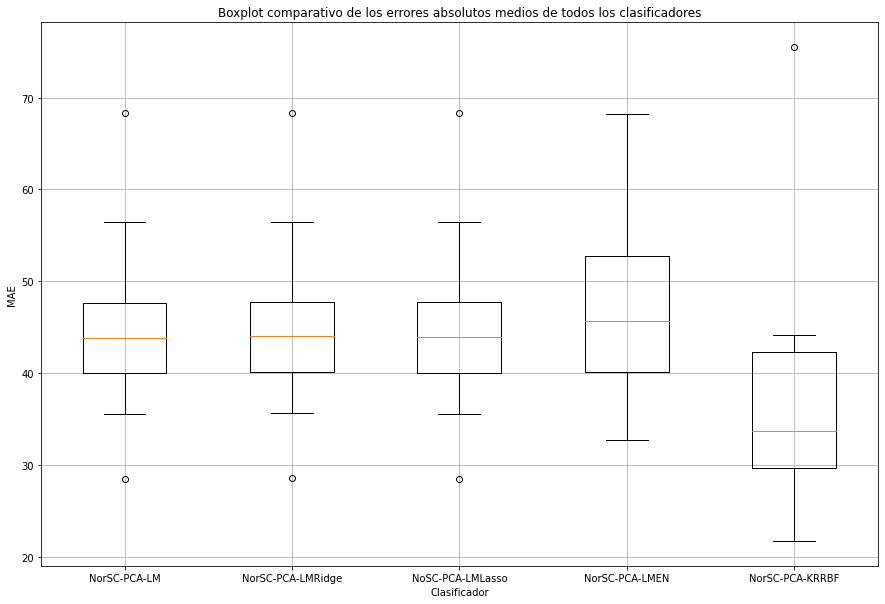

In [59]:
#Comparacion de los errores medios absolutos de todos los clasificadores
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.boxplot(maev)
plt.xticks(ticks=np.arange(len(steps))+1,labels=label_model)
plt.xlabel("Clasificador")
plt.ylabel("MAE")
plt.title("Boxplot comparativo de los errores absolutos medios de todos los clasificadores")
plt.grid()
plt.show()

En el grafico anterior se presenta la comparacion del error absoluto medio de todos los modelos probados en un diagrama de caja y bigotes (BoxPlot). Los modelos que fueron probados son los siguientes:
  * NorSC-PCA-LM: Modelo de regresion lineal simple con normalizado y PCA.

  * NorSC-PCA-LMRidge: Modelo de regresion lineal rigido con normalizado y PCA.

  * NorSC-PCA-LMLasso: Modelo de regresion lineal tipo Lasso con normalizado y PCA.

  * NorSC-PCA-LMEN: Modelo de regresion lineal ElasticNet con normalizado y PCA.

  * NorSC-KRRBF: Modelo de regresion KernelRidge de mapeo rbf con normalizado y PCA.


Del grafico podemos concluir que lo que GridSerch nos ha dicho anteriormente es cierto, el mejor modelo (con error medio absoluto mas bajo) para seguir nuestros datos es el KernelRidge-rbf.

  



Extrayendo el mejor modelo podriamos predecir los contagiados de el dia siguiente de la siguiente forma

In [64]:
# Predicion de contagiados al dia siguiente con el mejor modelo
best_model = grid_search.best_estimator_

y28abr = best_model.predict(np.array(X[-1]).reshape(1,-1))
y28abr

array([[6219.23651953]])

y podriamos compararlo con los datos de contagiados que tenemos de los ultimos 5 dias

In [61]:
#Contagiados de los ultimos 5 dias
X[-1]

array([4561, 4881, 5142, 5379, 5597], dtype=object)

#### Tambien podemos ver de manera grafica que tanto se ajustan las predicciones del modelo a los datos originales

In [0]:
#Evalualndo el ajuste de los datos
y_pred = best_model.predict(X)

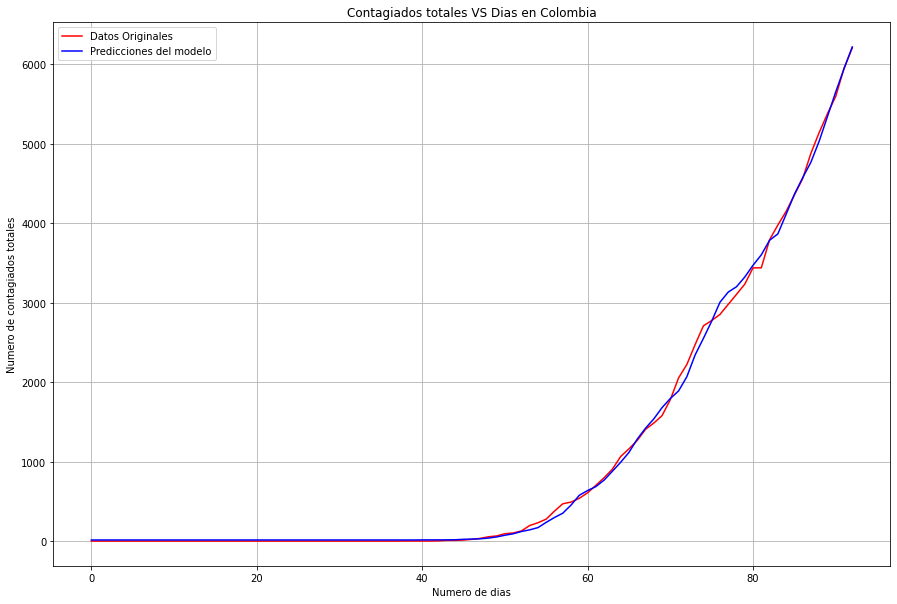

In [63]:
lab=["Datos Originales", "Predicciones del modelo"]
plt.plot(y,'r')
plt.plot(y_pred,'b')
plt.legend(labels=lab)
plt.xlabel("Numero de dias")
plt.ylabel("Numero de contagiados totales")
plt.title("Contagiados totales VS Dias en Colombia")
plt.grid()